# Author: Mubin Ahmad Tokhi
# Project Name: 4 MAJOR STOCK ANALYSIS
----

# Project Goal

1. Change of Price Over Time:
Analyzing the historical price trends of four major stocks to gain insights into their performance over time. This analysis aims to identify optimal investment opportunities and maximize potential profits.

2. Moving Average Price:
Evaluating the Moving Average (MA) Prices for 10, 20, and 50 periods to assess the stability and profitability of each stock. This analysis aids in making informed decisions about which stocks are likely to yield higher returns.

3. Closing Price and Resample (Focus on APPLE):
Examining the closing prices of APPLE to discern patterns and trends throughout different seasons and months. This information provides valuable insights into the optimal timing for buying or selling APPLE stocks.

4. Correlation Between Stocks:
Investigating the correlation between different stocks to identify potential synergies or divergences in their performance. This analysis assists in devising strategic investment plans by selecting pairs of stocks that complement each other for a balanced and diversified portfolio.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import glob

## Importing multiple data from the data sets. by using glob library. it gives as a simple way to implement and import the four major stocks that we need.

In [4]:
glob.glob(r'C:\Users\mobin\DATASIENCE\DATA ANALYTICS PROJECTS\SALES\individual_stocks_5yr/*.csv')

['C:\\Users\\mobin\\DATASIENCE\\DATA ANALYTICS PROJECTS\\SALES\\individual_stocks_5yr\\AAL_data.csv',
 'C:\\Users\\mobin\\DATASIENCE\\DATA ANALYTICS PROJECTS\\SALES\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\mobin\\DATASIENCE\\DATA ANALYTICS PROJECTS\\SALES\\individual_stocks_5yr\\AAP_data.csv',
 'C:\\Users\\mobin\\DATASIENCE\\DATA ANALYTICS PROJECTS\\SALES\\individual_stocks_5yr\\ABBV_data.csv',
 'C:\\Users\\mobin\\DATASIENCE\\DATA ANALYTICS PROJECTS\\SALES\\individual_stocks_5yr\\ABC_data.csv',
 'C:\\Users\\mobin\\DATASIENCE\\DATA ANALYTICS PROJECTS\\SALES\\individual_stocks_5yr\\ABT_data.csv',
 'C:\\Users\\mobin\\DATASIENCE\\DATA ANALYTICS PROJECTS\\SALES\\individual_stocks_5yr\\ACN_data.csv',
 'C:\\Users\\mobin\\DATASIENCE\\DATA ANALYTICS PROJECTS\\SALES\\individual_stocks_5yr\\ADBE_data.csv',
 'C:\\Users\\mobin\\DATASIENCE\\DATA ANALYTICS PROJECTS\\SALES\\individual_stocks_5yr\\ADI_data.csv',
 'C:\\Users\\mobin\\DATASIENCE\\DATA ANALYTICS PROJECTS\\SALES\\individual_stoc

In [5]:
company_list = [
    r'C:\\Users\\mobin\\DATASIENCE\\DATA ANALYTICS PROJECTS\\SALES\\individual_stocks_5yr\\AAPL_data.csv',
    r'C:\\Users\\mobin\\DATASIENCE\\DATA ANALYTICS PROJECTS\\SALES\\individual_stocks_5yr\\AMZN_data.csv',
    r'C:\\Users\\mobin\\DATASIENCE\\DATA ANALYTICS PROJECTS\\SALES\\individual_stocks_5yr\\GOOGL_data.csv',
    r'C:\\Users\\mobin\\DATASIENCE\\DATA ANALYTICS PROJECTS\\SALES\\individual_stocks_5yr\\MSFT_data.csv',
]

In [6]:
all_data = pd.DataFrame()

for i in company_list:
    current_data = pd.read_csv(i)
    all_data = pd.concat([all_data, current_data] ,  ignore_index = True)

In [7]:
all_data.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [8]:
all_data['Name'].unique()

array(['AAPL', 'AMZN', 'GOOGL', 'MSFT'], dtype=object)

In [9]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

## CHANGE OF THE PRICE OVERTIME

In [10]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [11]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [12]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [13]:
all_comp = all_data['Name'].unique()

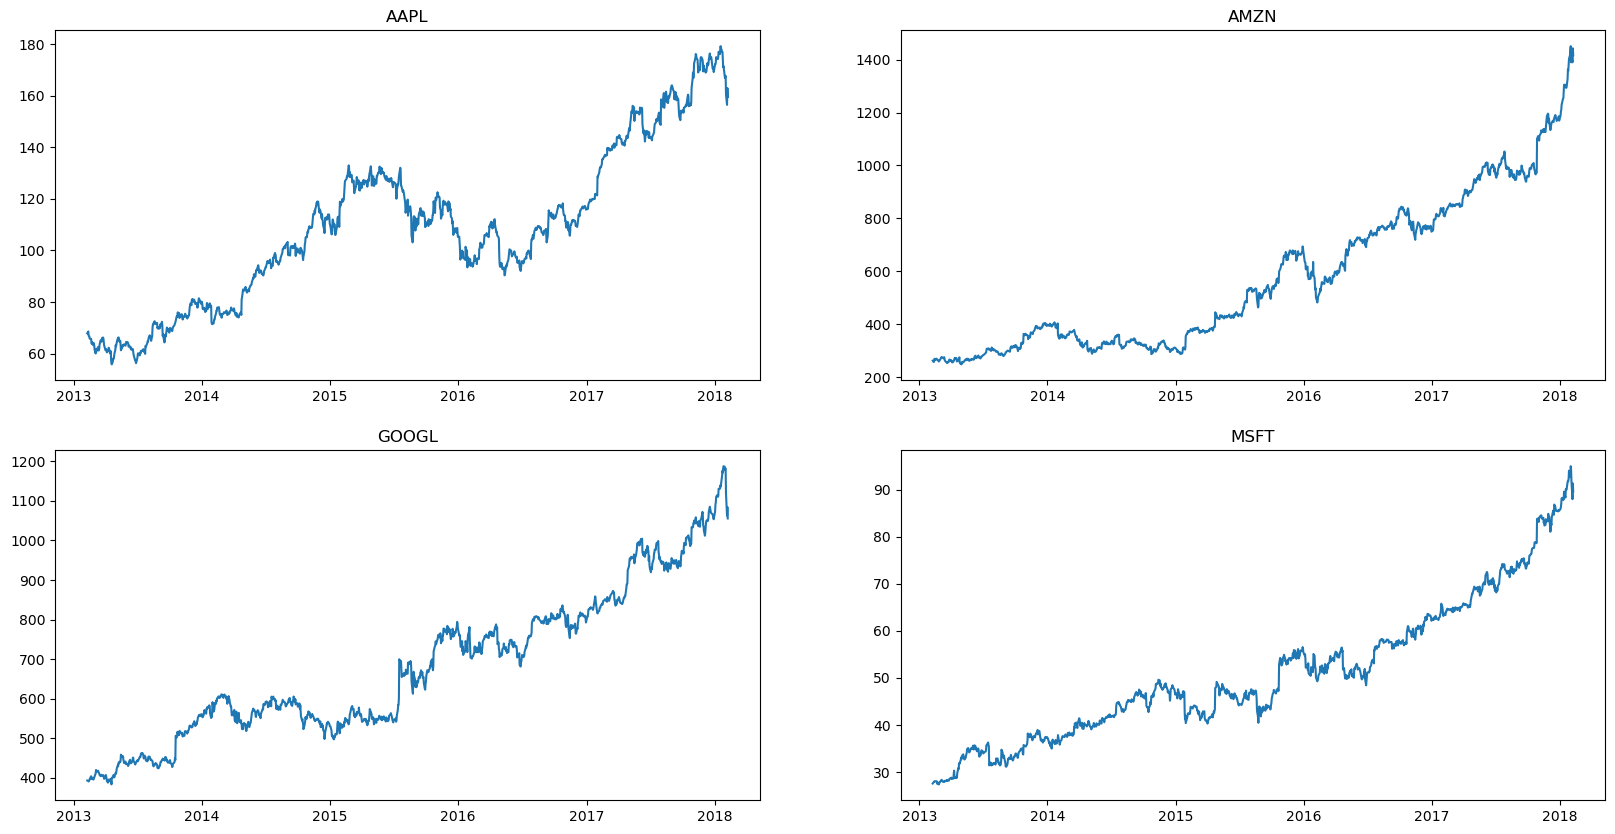

In [14]:
plt.figure(figsize = (20,10))
for index,company in enumerate(all_comp, 1):
    plt.subplot(2,2,index)
    filter1 =  company == all_data['Name'] 
    df = all_data[filter1]
    plt.plot(df['date'], df['close'])
    plt.title(company)
    

## MOVING AVERAGE OF STOCKS

In [15]:
all_data.head()

date     open     high      low    close     volume  Name
0 2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1 2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2 2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3 2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4 2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [16]:
new_data = all_data.copy()

In [17]:
new_data.head()

date     open     high      low    close     volume  Name
0 2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1 2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2 2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3 2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4 2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [18]:
ma_day = [10,20,50]

for ma in ma_day:
    new_data['close' + str(ma)] = new_data['close'].rolling(ma).mean()

In [19]:
new_data.tail()

date   open    high      low  close    volume  Name  close10  \
5031 2018-02-01  94.79  96.070  93.5813  94.26  47227882  MSFT   92.765   
5032 2018-02-02  93.64  93.970  91.5000  91.78  47867753  MSFT   92.943   
5033 2018-02-05  90.56  93.240  88.0000  88.00  51031465  MSFT   92.582   
5034 2018-02-06  86.89  91.475  85.2500  91.33  67998564  MSFT   92.525   
5035 2018-02-07  90.49  91.770  89.2000  89.61  41107592  MSFT   92.304   

      close20  close50  
5031  90.6770  86.9978  
5032  90.9105  87.1828  
5033  90.9010  87.2684  
5034  91.0535  87.4328  
5035  91.1230  87.5598

In [20]:
new_data.set_index('date' , inplace = True)

In [21]:
new_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close10', 'close20',
       'close50'],
      dtype='object')

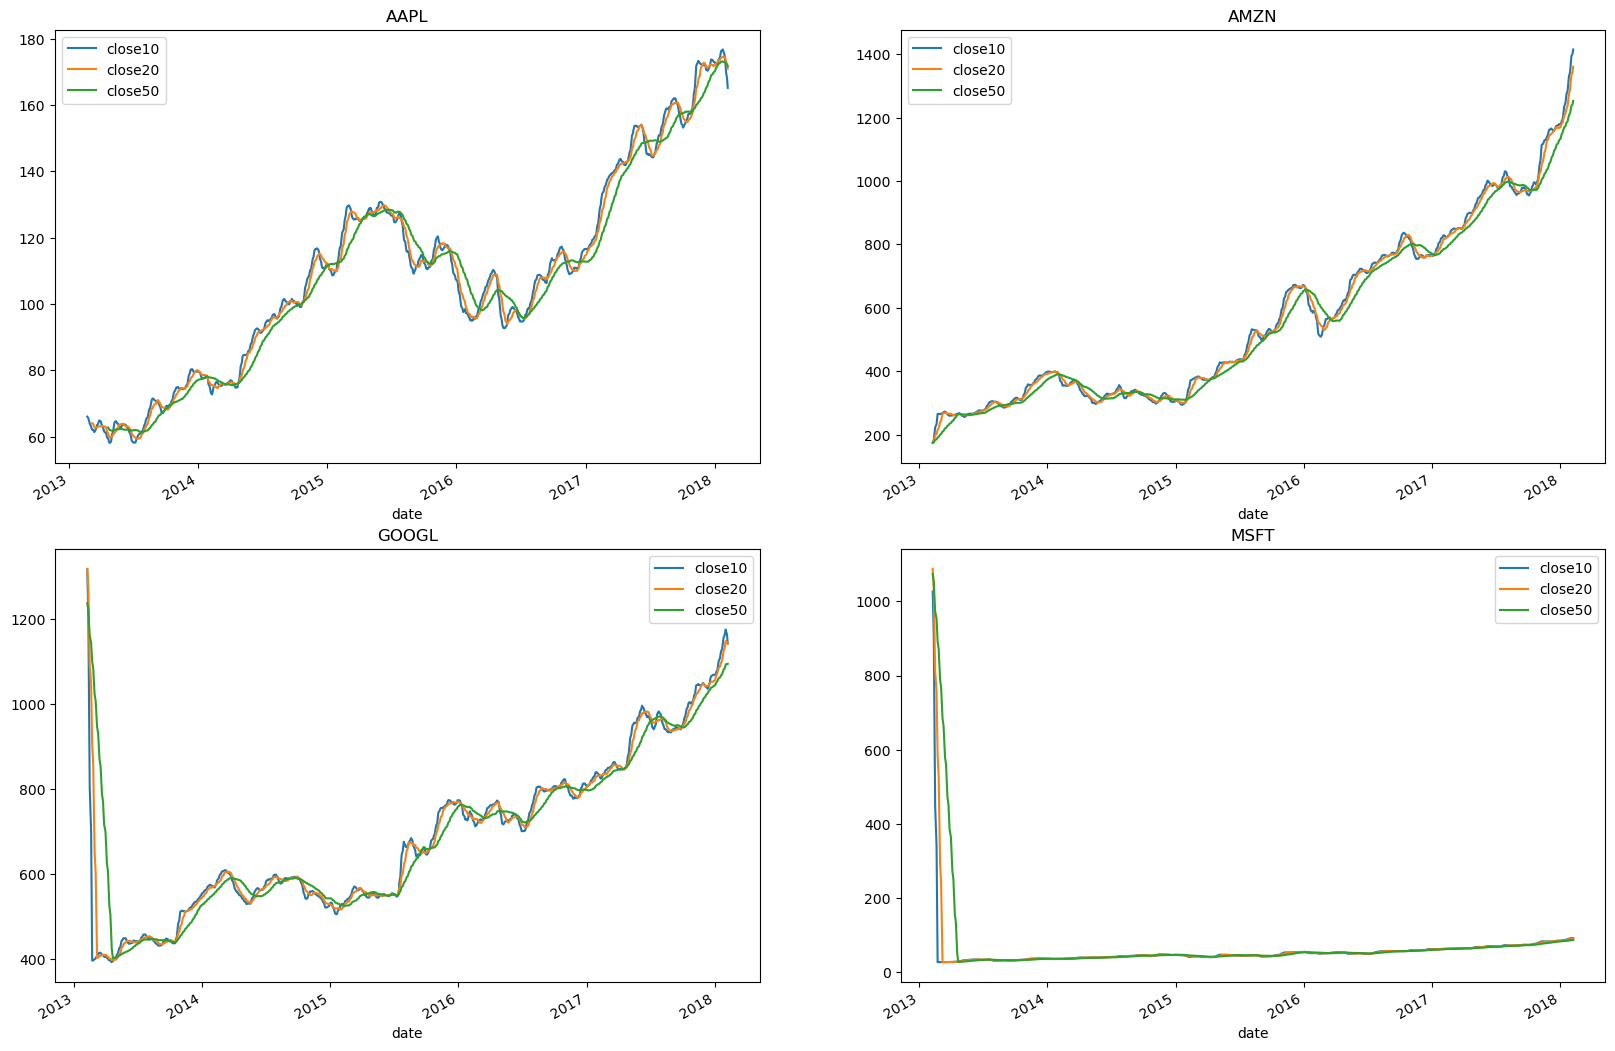

In [22]:
plt.figure(figsize = (20,14))

for index, company in enumerate(all_comp ,  1):
    plt.subplot(2,2,index)
    filter1 = company == new_data['Name']
    df = new_data[filter1]
    df[['close10', 'close20','close50']].plot(ax = plt.gca())
    plt.title(company)

In [23]:
new_data.head()

open     high      low    close     volume  Name  close10  \
date                                                                       
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL      NaN   
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL      NaN   
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL      NaN   
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL      NaN   
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL      NaN   

            close20  close50  
date                          
2013-02-08      NaN      NaN  
2013-02-11      NaN      NaN  
2013-02-12      NaN      NaN  
2013-02-13      NaN      NaN  
2013-02-14      NaN      NaN

## Closing Price Change In Apple Stock

In [24]:
apple = pd.read_csv(r'C:\\Users\\mobin\\DATASIENCE\\DATA ANALYTICS PROJECTS\\SALES\\individual_stocks_5yr\\AAPL_data.csv')

In [25]:
apple.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [26]:
apple['Price Change'] = apple['close'].pct_change()

In [27]:
apple['Price Change'] = apple['close'].pct_change() * 100

In [28]:
apple['Price Change']

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: Price Change, Length: 1259, dtype: float64

<Axes: xlabel='date', ylabel='Price Change'>

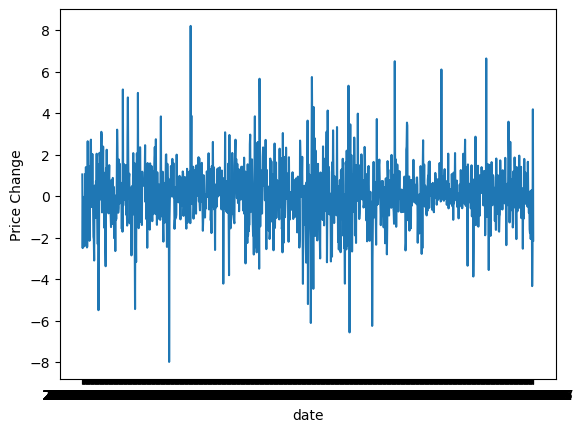

In [29]:
sns.lineplot(data = apple, x = 'date' , y = 'Price Change')

In [30]:
import plotly.express as px

In [31]:
px.line(apple, x = 'date' , y = 'Price Change')

## RESAMPLING OF CLOSING PRICE

In [32]:
apple.head()

date     open     high      low    close     volume  Name  \
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

   Price Change  
0           NaN  
1      1.042235  
2     -2.506658  
3     -0.190297  
4     -0.089934

In [33]:
apple.dtypes

date             object
open            float64
high            float64
low             float64
close           float64
volume            int64
Name             object
Price Change    float64
dtype: object

In [34]:
apple['date'] = pd.to_datetime(apple['date'])

In [35]:
apple.dtypes

date            datetime64[ns]
open                   float64
high                   float64
low                    float64
close                  float64
volume                   int64
Name                    object
Price Change           float64
dtype: object

In [36]:
apple.set_index('date' , inplace = True)

In [37]:
apple.head(2)

open     high      low    close     volume  Name  Price Change
date                                                                         
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL           NaN
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL      1.042235

In [38]:
fig , ax = plt.subplots(ncols = 2)
ax[0].plot(apple['close'].resample('Y').mean())
ax[1].plot(apple['close'].resample('M').mean())

## CHEACKING THE CORRELATION OF THE COMPANIES

In [39]:
company_li = [
    r'C:\\Users\\mobin\\DATASIENCE\\DATA ANALYTICS PROJECTS\\SALES\\individual_stocks_5yr\\AAPL_data.csv',
    r'C:\\Users\\mobin\\DATASIENCE\\DATA ANALYTICS PROJECTS\\SALES\\individual_stocks_5yr\\AMZN_data.csv',
    r'C:\\Users\\mobin\\DATASIENCE\\DATA ANALYTICS PROJECTS\\SALES\\individual_stocks_5yr\\GOOGL_data.csv',
    r'C:\\Users\\mobin\\DATASIENCE\\DATA ANALYTICS PROJECTS\\SALES\\individual_stocks_5yr\\MSFT_data.csv',
]

In [40]:
appl = pd.read_csv(company_li[0])
amzn = pd.read_csv(company_li[1])
goog = pd.read_csv(company_li[2])
msft = pd.read_csv(company_li[3])

In [41]:
new_data = pd.DataFrame()

In [42]:
new_data['appl'] = appl['close']
new_data['amzn'] = amzn['close']
new_data['goog'] = goog['close']
new_data['msft'] = msft['close']

In [43]:
new_data.head()

appl    amzn      goog   msft
0  67.8542  261.95  393.0777  27.55
1  68.5614  257.21  391.6012  27.86
2  66.8428  258.70  390.7403  27.88
3  66.7156  269.47  391.8214  28.03
4  66.6556  269.24  394.3039  28.04

C:\Users\mobin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



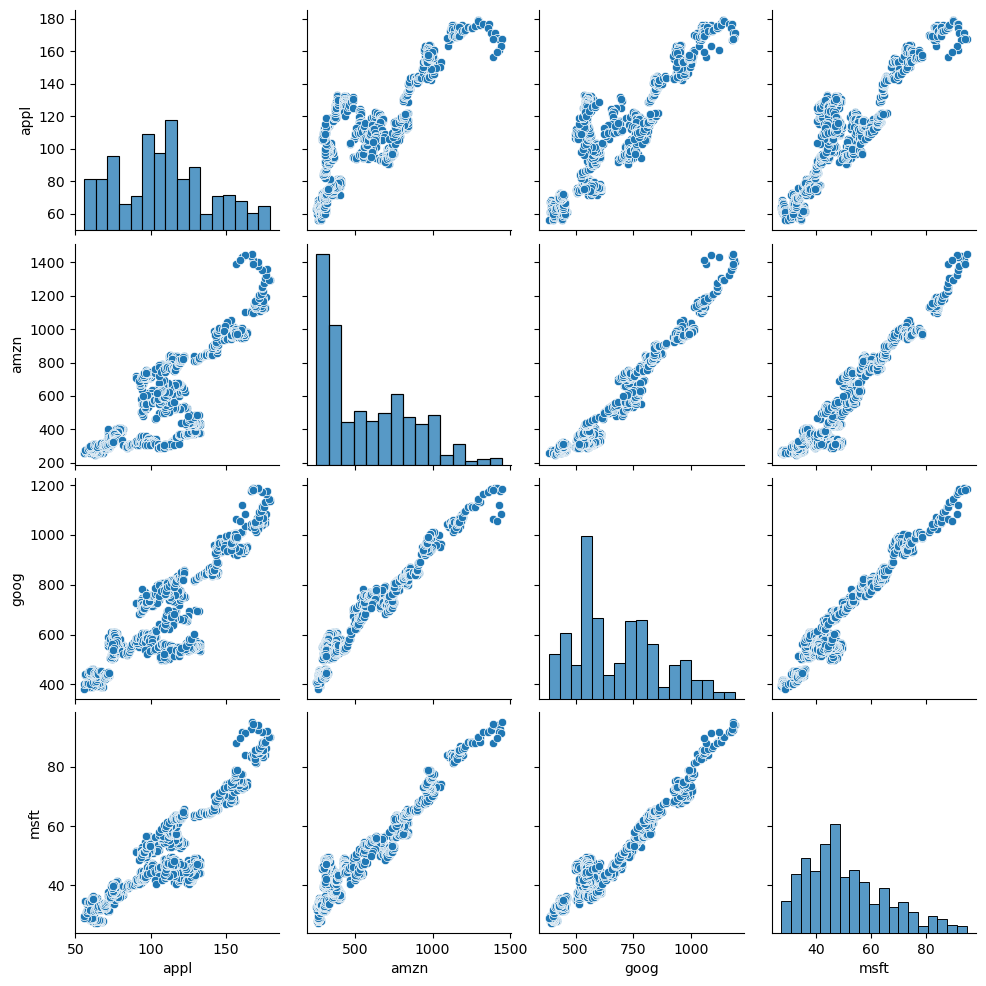

In [44]:
sns.pairplot(new_data)

## Daily Return on Stocks and Closing Prices are Correlated

In [48]:
new_data1 = pd.DataFrame()


In [49]:
new_data1['apple_change'] = appl['close'].pct_change() * 100
new_data1['Amazon_change'] = amzn['close'].pct_change() * 100
new_data1['Google_change'] = goog['close'].pct_change() * 100
new_data1['Microsoft_change'] = msft['close'].pct_change() * 100

In [50]:
new_data1.head()

apple_change  Amazon_change  Google_change  Microsoft_change
0           NaN            NaN            NaN               NaN
1      1.042235      -1.809506      -0.375625          1.125227
2     -2.506658       0.579293      -0.219841          0.071788
3     -0.190297       4.163123       0.276680          0.538020
4     -0.089934      -0.085353       0.633579          0.035676

C:\Users\mobin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



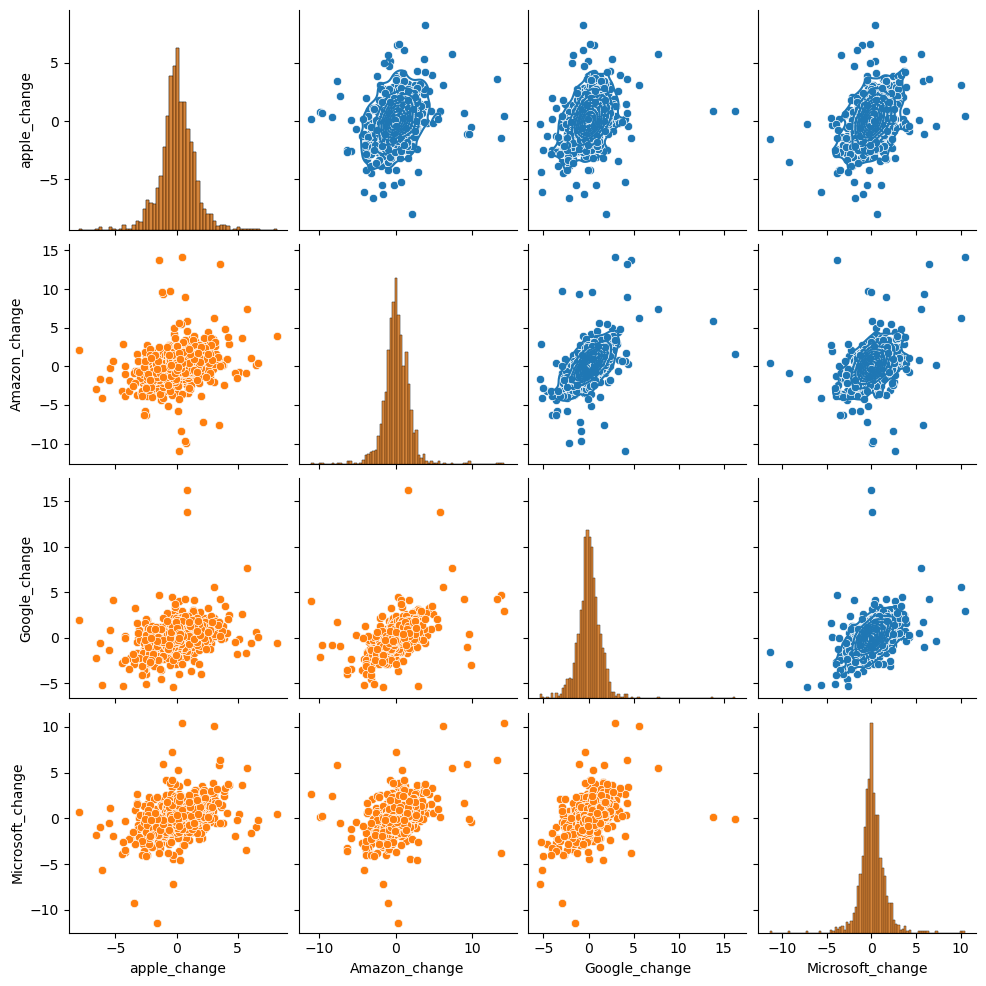

In [56]:
g = sns.pairplot(new_data1)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)